## Rikiddo -CPMM comparison

This is the first theoretical approach to Rikiddo's behavior compared to the CPMM, the most widely implemented model when referring to liquidity pools. It is important to clarify that this information is based on random simulations of transactions, **which are not remotely close to representing human behavior and the pertinent reactions to human incentives**.
The objective of this first approach is to see similarities and differences between these two market makers in the face of an identical sequence of operations.

In [1]:
from cpmm import CPMM
from rikiddo import RikiddoScoringRule
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fmin_cobyla
import math

initial_outcome = ['A', 'B']

n = 200
outcome = 0.001
amount = np.random.random([n]) * 500. 
outcomes = []
values = list(range(10))
for i in range(n):
    #outcomes += random.choices(list(range(len(initial_outcome))), weights=[random.choice(values),
    #                                                                       random.choice(values)])
    outcomes += random.choices(list(range(len(initial_outcome))))
    
operation = []
for i in range(n):
    for j in range(0,3):
        operation += [j]

outcomes = np.array(outcomes)
operation = np.array(operation)

In [2]:
initial_state = {0: 10000, 1: 10000, 'ZTG':10000}
cpmm = CPMM(initial_state = initial_state, fee = 0.03)

In [3]:
for i, a, o, r in zip(range(n),amount, outcomes, operation):
    if r == 0:
        #buy shares
        cpmm.buy_shares(a, asset_out= o)
    elif r == 1:
        #sell shares
        cpmm.sell_shares(a, asset_in=o)
    else:
        #provide liquidity
        cpmm.provide_liquidity(id= i, amount = a)
        
    print(cpmm.get_prices())

{0: 0.49400967743548885, 1: 0.5059903225645113}
{0: 0.5060412109360309, 1: 0.4939587890639691}
{0: 0.5058523870795126, 1: 0.4941476129204873}
{0: 0.5087813694602236, 1: 0.4912186305397765}
{0: 0.5043901147231348, 1: 0.4956098852768652}
{0: 0.5043388194248931, 1: 0.49566118057510683}
{0: 0.5094467050275934, 1: 0.49055329497240674}
{0: 0.5031010600903375, 1: 0.4968989399096625}
{0: 0.5030813010798217, 1: 0.49691869892017826}
{0: 0.49509039851109204, 1: 0.504909601488908}
{0: 0.48790137879634005, 1: 0.5120986212036598}
{0: 0.4881937075826322, 1: 0.5118062924173676}
{0: 0.48483298942440956, 1: 0.5151670105755904}
{0: 0.49372630841585147, 1: 0.5062736915841486}
{0: 0.494036954233426, 1: 0.505963045766574}
{0: 0.4906797093278842, 1: 0.5093202906721158}
{0: 0.4866622571862531, 1: 0.5133377428137468}
{0: 0.48712300623578125, 1: 0.5128769937642187}
{0: 0.4957682383151657, 1: 0.5042317616848342}
{0: 0.5042707077158192, 1: 0.4957292922841809}
{0: 0.5040850068228705, 1: 0.4959149931771296}
{0: 0.4

In [4]:
list(cpmm.get_prices().values())

[0.5263328784810295, 0.47366712151897045]

In [5]:
rsc = RikiddoScoringRule(initial_outcome, n_params = [0.2, 10, 2], init=10., vig=0.1)

In [6]:
#rsc = RikiddoScoringRule(initial_outcome, vig = 0.02, n_params = [1.2, 4.5, 2], mrc=0.1) 
#rsc.initial_liquidity(initial_outcome, 10000)

In [7]:
for i, a, o, r in zip(range(n),amount, outcomes, operation):

    if r == 0:
        #buy shares
        rsc.buy_shares('Trader-%d'%(i), a, int(o))
    #else:
    #    rsc.sell_shares('Trader-%d'%(i), a, int(o))
    elif r == 1:
        #sell shares
        rsc.sell_shares('Trader-%d'%(i), a, int(o))
    else:
        #provide liquidity
        rsc.liquidity_providing('Trader-%d'%(i), a)
    
    rsc.outcome_probability()

Trader-0 BOUGHT 251.79 shares of outcome 1
Trader-1 SOLD 473.81 shares of outcome 0
Trader-2 provided liquidity the equivalent to 306.30 ZTG. 10.55 units of asset 1, and 295.75 units of asset 2
Trader-3 BOUGHT 2452.70 shares of outcome 0
Trader-4 SOLD 174.69 shares of outcome 1
Trader-5 provided liquidity the equivalent to 113.50 ZTG. 107.05 units of asset 1, and 6.45 units of asset 2
Trader-6 BOUGHT 217.98 shares of outcome 0
Trader-7 SOLD 250.52 shares of outcome 1
Trader-8 provided liquidity the equivalent to 60.68 ZTG. 57.39 units of asset 1, and 3.29 units of asset 2
Trader-9 BOUGHT 4987.79 shares of outcome 1
Trader-10 SOLD 284.79 shares of outcome 1
Trader-11 provided liquidity the equivalent to 226.03 ZTG. 55.43 units of asset 1, and 170.59 units of asset 2
Trader-12 BOUGHT 178.54 shares of outcome 1
Trader-13 SOLD 344.04 shares of outcome 0
Trader-14 provided liquidity the equivalent to 463.36 ZTG. 109.27 units of asset 1, and 354.09 units of asset 2
Trader-15 BOUGHT 172.64 sh

Trader-126 BOUGHT 167.20 shares of outcome 0
Trader-127 SOLD 265.08 shares of outcome 1
Trader-128 provided liquidity the equivalent to 257.06 ZTG. 102.03 units of asset 1, and 155.03 units of asset 2
Trader-129 BOUGHT 20.07 shares of outcome 0
Trader-130 SOLD 268.77 shares of outcome 1
Trader-131 provided liquidity the equivalent to 259.27 ZTG. 102.53 units of asset 1, and 156.74 units of asset 2
Trader-132 BOUGHT 485.44 shares of outcome 1
Trader-133 SOLD 249.27 shares of outcome 1
Trader-134 provided liquidity the equivalent to 61.82 ZTG. 23.82 units of asset 1, and 37.99 units of asset 2
Trader-135 BOUGHT 953.94 shares of outcome 0
Trader-136 SOLD 167.35 shares of outcome 0
Trader-137 provided liquidity the equivalent to 294.78 ZTG. 120.40 units of asset 1, and 174.38 units of asset 2
Trader-138 BOUGHT 1122.52 shares of outcome 0
Trader-139 SOLD 347.72 shares of outcome 1
Trader-140 provided liquidity the equivalent to 304.05 ZTG. 132.72 units of asset 1, and 171.32 units of asset 

In [8]:
rsc.outcome_probability()

array([0.485228, 0.514772])

In [9]:
rsc.book

,name,shares,outcome,paid,cost_function,dynamic_fee,lp
0,Trader-0,251.79392012789188,1,249.793983,259.441653,0.000000,0
1,Trader-1,-473.80897,0,2.642647,259.441653,0.000000,0
2,Trader-2,10.550472,A,0.034445,259.441653,0.000000,1
3,Trader-2,295.752328,B,0.965555,259.441653,0.000000,1
4,Trader-3,2452.703105517283,0,118.858027,2503.492454,0.000000,0
...,...,...,...,...,...,...,...
261,Trader-196,-52.160313,1,27.701916,30024.793626,0.056349,0
262,Trader-197,233.139778,A,0.467239,30024.793626,0.000000,1
263,Trader-197,265.833027,B,0.532761,30024.793626,0.000000,1
264,Trader-198,911.2419811908384,0,433.787627,30461.789312,0.048871,0


In [10]:
#plt.plot(rsc.book['fee_cost'])
#plt.show()

In [11]:
#cpmm._history

In [12]:
rsc_asset1 = []
rsc_asset2 = list([])
for i in list(rsc._history):
    rsc_asset1.append(i[0])
    rsc_asset2.append(i[1])

cpmm_asset1 = list([])
cpmm_asset2 = list([])
for i in cpmm._history:
    cpmm_asset1.append(i[0])
    cpmm_asset2.append(i[1])

#assert(len(rsc_asset1) == len(cpmm_asset1) == len(rsc_asset2) == len(cpmm_asset2))

In [13]:
df = pd.DataFrame([rsc_asset1, rsc_asset2, cpmm_asset1, cpmm_asset2]).T
#df = df.T
df.columns = ['rsc_asset1', 'rsc_asset2', 'cpmm_asset1', 'cpmm_asset2']
df

,rsc_asset1,rsc_asset2,cpmm_asset1,cpmm_asset2
0,0.034445,0.965555,0.494010,0.505990
1,0.034445,0.965555,0.506041,0.493959
2,0.034445,0.965555,0.505852,0.494148
3,0.943214,0.056786,0.508781,0.491219
4,0.943214,0.056786,0.504390,0.495610
...,...,...,...,...
195,0.468444,0.531556,0.526423,0.473577
196,0.467239,0.532761,0.525267,0.474733
197,0.467747,0.532253,0.523363,0.476637
198,0.485054,0.514946,0.532775,0.467225


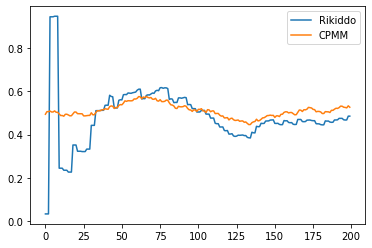

In [14]:
plt.plot(df['rsc_asset1'], label='Rikiddo')
plt.plot(df['cpmm_asset1'], label= 'CPMM')
plt.legend()
plt.show()

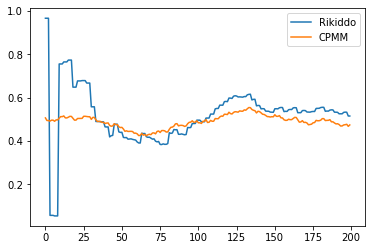

In [15]:
plt.plot(df['rsc_asset2'], label='Rikiddo')
plt.plot(df['cpmm_asset2'], label= 'CPMM')
plt.legend()
plt.show()

In [16]:
for i in range(10):
    first = random.choice([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.1, 1.2, 1.3, 1.4, 
                           1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3])
    second = random.choice([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6.5, 7, 7.5, 8])
    print(f'Iterating for a first parameter equal to {first} and a second one equal to {second}')
    try:
        rsc = RikiddoScoringRule(initial_outcome, n_params = [first, second, 2])
        #rsc = RikiddoScoringRule(initial_outcome, n_params = [first, second, 2]) 
        
        for i, a, o, r in zip(range(n),amount, outcomes, operation):
            if r == 0:
                #buy shares
                rsc.buy_shares('Trader-%d'%(i), a, int(o))
            elif r == 1:
                #sell shares
                rsc.sell_shares('Trader-%d'%(i), a, int(o))
            else:
                #provide liquidity
                rsc.liquidity_providing('Trader-%d'%(i), a)
                


        rsc_asset1 = list([])
        rsc_asset2 = list([])
        for i in list(rsc._history):
            rsc_asset1.append(i[0])
            rsc_asset2.append(i[1])

        df[f'rsc_asset1_{first}_{second}'] = pd.Series(rsc_asset1)
        df[f'rsc_asset2_{first}_{second}'] = pd.Series(rsc_asset2)
    except:
        print('val error')
        pass

Iterating for a first parameter equal to 1.3 and a second one equal to 3.5
Trader-0 BOUGHT 499.59 shares of outcome 1
Trader-1 SOLD 473.81 shares of outcome 0
Trader-2 provided liquidity the equivalent to 306.30 ZTG. 9.34 units of asset 1, and 296.96 units of asset 2


/Users/numacodes/Developer/Zeitgeist/rikiddo_cpmm_compare/rikiddo.py:105: RuntimeWarning: overflow encountered in exp
  return self.b*np.log(np.exp(x/self.b).sum())


Trader-3 BOUGHT 2898.07 shares of outcome 0
Trader-4 SOLD 174.69 shares of outcome 1
Trader-5 provided liquidity the equivalent to 113.50 ZTG. 104.45 units of asset 1, and 9.05 units of asset 2
Trader-6 BOUGHT 223.15 shares of outcome 0
Trader-7 SOLD 250.52 shares of outcome 1
Trader-8 provided liquidity the equivalent to 60.68 ZTG. 56.12 units of asset 1, and 4.57 units of asset 2
Trader-9 BOUGHT 3315.60 shares of outcome 1
Trader-10 SOLD 284.79 shares of outcome 1
Trader-11 provided liquidity the equivalent to 226.03 ZTG. 93.62 units of asset 1, and 132.41 units of asset 2
Trader-12 BOUGHT 226.91 shares of outcome 1
Trader-13 SOLD 344.04 shares of outcome 0
Trader-14 provided liquidity the equivalent to 463.36 ZTG. 180.91 units of asset 1, and 282.45 units of asset 2
Trader-15 BOUGHT 214.00 shares of outcome 1
Trader-16 SOLD 156.63 shares of outcome 1
Trader-17 provided liquidity the equivalent to 324.22 ZTG. 119.90 units of asset 1, and 204.33 units of asset 2
Trader-18 BOUGHT 829.8

Trader-130 SOLD 268.77 shares of outcome 1
Trader-131 provided liquidity the equivalent to 259.27 ZTG. 120.64 units of asset 1, and 138.62 units of asset 2
Trader-132 BOUGHT 551.34 shares of outcome 1
Trader-133 SOLD 249.27 shares of outcome 1
Trader-134 provided liquidity the equivalent to 61.82 ZTG. 28.46 units of asset 1, and 33.36 units of asset 2
Trader-135 BOUGHT 815.21 shares of outcome 0
Trader-136 SOLD 167.35 shares of outcome 0
Trader-137 provided liquidity the equivalent to 294.78 ZTG. 137.19 units of asset 1, and 157.59 units of asset 2
Trader-138 BOUGHT 1005.91 shares of outcome 0
Trader-139 SOLD 347.72 shares of outcome 1
Trader-140 provided liquidity the equivalent to 304.05 ZTG. 144.34 units of asset 1, and 159.70 units of asset 2
Trader-141 BOUGHT 549.70 shares of outcome 0
Trader-142 SOLD 288.51 shares of outcome 0
Trader-143 provided liquidity the equivalent to 258.15 ZTG. 124.13 units of asset 1, and 134.02 units of asset 2
Trader-144 BOUGHT 408.35 shares of outcome

Trader-57 BOUGHT 89.82 shares of outcome 0
Trader-58 SOLD 329.75 shares of outcome 0
Trader-59 provided liquidity the equivalent to 51.89 ZTG. 29.21 units of asset 1, and 22.68 units of asset 2
Trader-60 BOUGHT 249.61 shares of outcome 0
Trader-61 SOLD 344.42 shares of outcome 0
Trader-62 provided liquidity the equivalent to 132.31 ZTG. 77.09 units of asset 1, and 55.22 units of asset 2
Trader-63 BOUGHT 894.38 shares of outcome 1
Trader-64 SOLD 337.58 shares of outcome 0
Trader-65 provided liquidity the equivalent to 308.22 ZTG. 173.57 units of asset 1, and 134.65 units of asset 2
Trader-66 BOUGHT 424.18 shares of outcome 0
Trader-67 SOLD 201.01 shares of outcome 1
Trader-68 provided liquidity the equivalent to 236.09 ZTG. 136.26 units of asset 1, and 99.82 units of asset 2
Trader-69 BOUGHT 134.27 shares of outcome 0
Trader-70 SOLD 319.34 shares of outcome 1
Trader-71 provided liquidity the equivalent to 52.05 ZTG. 31.08 units of asset 1, and 20.97 units of asset 2
Trader-72 BOUGHT 315

Trader-183 BOUGHT 845.39 shares of outcome 0
Trader-184 SOLD 41.55 shares of outcome 1
Trader-185 provided liquidity the equivalent to 241.86 ZTG. 116.07 units of asset 1, and 125.79 units of asset 2
Trader-186 BOUGHT 271.67 shares of outcome 1
Trader-187 SOLD 443.61 shares of outcome 0
Trader-188 provided liquidity the equivalent to 105.95 ZTG. 50.36 units of asset 1, and 55.58 units of asset 2
Trader-189 BOUGHT 501.03 shares of outcome 0
Trader-190 SOLD 194.60 shares of outcome 0
Trader-191 provided liquidity the equivalent to 255.01 ZTG. 122.94 units of asset 1, and 132.07 units of asset 2
Trader-192 BOUGHT 342.06 shares of outcome 0
Trader-193 SOLD 302.30 shares of outcome 0
Trader-194 provided liquidity the equivalent to 67.57 ZTG. 32.88 units of asset 1, and 34.69 units of asset 2
Trader-195 BOUGHT 396.35 shares of outcome 1
Trader-196 SOLD 52.16 shares of outcome 1
Trader-197 provided liquidity the equivalent to 498.97 ZTG. 240.06 units of asset 1, and 258.91 units of asset 2
Tr

Trader-108 BOUGHT 681.30 shares of outcome 1
Trader-109 SOLD 155.47 shares of outcome 0
Trader-110 provided liquidity the equivalent to 156.60 ZTG. 78.96 units of asset 1, and 77.64 units of asset 2
Trader-111 BOUGHT 990.84 shares of outcome 1
Trader-112 SOLD 27.72 shares of outcome 0
Trader-113 provided liquidity the equivalent to 90.82 ZTG. 44.93 units of asset 1, and 45.89 units of asset 2
Trader-114 BOUGHT 674.56 shares of outcome 1
Trader-115 SOLD 173.55 shares of outcome 1
Trader-116 provided liquidity the equivalent to 470.02 ZTG. 229.54 units of asset 1, and 240.48 units of asset 2
Trader-117 BOUGHT 792.67 shares of outcome 1
Trader-118 SOLD 22.09 shares of outcome 0
Trader-119 provided liquidity the equivalent to 328.75 ZTG. 158.16 units of asset 1, and 170.59 units of asset 2
Trader-120 BOUGHT 911.79 shares of outcome 1
Trader-121 SOLD 281.92 shares of outcome 0
Trader-122 provided liquidity the equivalent to 446.26 ZTG. 212.61 units of asset 1, and 233.65 units of asset 2
Tr

Trader-36 BOUGHT 22.47 shares of outcome 0
Trader-37 SOLD 170.51 shares of outcome 0
Trader-38 provided liquidity the equivalent to 121.13 ZTG. 63.08 units of asset 1, and 58.04 units of asset 2
Trader-39 BOUGHT 385.67 shares of outcome 0
Trader-40 SOLD 65.29 shares of outcome 1
Trader-41 provided liquidity the equivalent to 391.35 ZTG. 207.26 units of asset 1, and 184.09 units of asset 2
Trader-42 BOUGHT 907.21 shares of outcome 0
Trader-43 SOLD 147.92 shares of outcome 0
Trader-44 provided liquidity the equivalent to 435.58 ZTG. 230.44 units of asset 1, and 205.14 units of asset 2
Trader-45 BOUGHT 907.39 shares of outcome 1
Trader-46 SOLD 195.47 shares of outcome 0
Trader-47 provided liquidity the equivalent to 259.29 ZTG. 133.38 units of asset 1, and 125.90 units of asset 2
Trader-48 BOUGHT 872.78 shares of outcome 0
Trader-49 SOLD 160.82 shares of outcome 0
Trader-50 provided liquidity the equivalent to 223.44 ZTG. 116.86 units of asset 1, and 106.58 units of asset 2
Trader-51 BOUG

Trader-165 BOUGHT 976.81 shares of outcome 0
Trader-166 SOLD 499.73 shares of outcome 0
Trader-167 provided liquidity the equivalent to 433.87 ZTG. 214.96 units of asset 1, and 218.91 units of asset 2
Trader-168 BOUGHT 546.28 shares of outcome 1
Trader-169 SOLD 374.50 shares of outcome 0
Trader-170 provided liquidity the equivalent to 366.67 ZTG. 180.64 units of asset 1, and 186.03 units of asset 2
Trader-171 BOUGHT 288.20 shares of outcome 0
Trader-172 SOLD 372.53 shares of outcome 0
Trader-173 provided liquidity the equivalent to 369.92 ZTG. 182.98 units of asset 1, and 186.93 units of asset 2
Trader-174 BOUGHT 130.59 shares of outcome 1
Trader-175 SOLD 279.15 shares of outcome 1
Trader-176 provided liquidity the equivalent to 472.87 ZTG. 233.51 units of asset 1, and 239.35 units of asset 2
Trader-177 BOUGHT 881.10 shares of outcome 1
Trader-178 SOLD 82.44 shares of outcome 0
Trader-179 provided liquidity the equivalent to 185.12 ZTG. 90.83 units of asset 1, and 94.29 units of asset 

Trader-90 BOUGHT 77.02 shares of outcome 0
Trader-91 SOLD 161.62 shares of outcome 0
Trader-92 provided liquidity the equivalent to 497.04 ZTG. 283.57 units of asset 1, and 213.47 units of asset 2
Trader-93 BOUGHT 946.71 shares of outcome 1
Trader-94 SOLD 254.02 shares of outcome 1
Trader-95 provided liquidity the equivalent to 423.53 ZTG. 230.48 units of asset 1, and 193.05 units of asset 2
Trader-96 BOUGHT 571.78 shares of outcome 1
Trader-97 SOLD 286.37 shares of outcome 0
Trader-98 provided liquidity the equivalent to 489.52 ZTG. 257.82 units of asset 1, and 231.70 units of asset 2
Trader-99 BOUGHT 530.91 shares of outcome 1
Trader-100 SOLD 377.76 shares of outcome 0
Trader-101 provided liquidity the equivalent to 160.46 ZTG. 82.87 units of asset 1, and 77.59 units of asset 2
Trader-102 BOUGHT 245.48 shares of outcome 0
Trader-103 SOLD 388.08 shares of outcome 1
Trader-104 provided liquidity the equivalent to 108.52 ZTG. 56.63 units of asset 1, and 51.88 units of asset 2
Trader-105

Trader-18 BOUGHT 829.85 shares of outcome 0
Trader-19 SOLD 329.27 shares of outcome 0
Trader-20 provided liquidity the equivalent to 402.99 ZTG. 188.54 units of asset 1, and 214.45 units of asset 2
Trader-21 BOUGHT 534.09 shares of outcome 1
Trader-22 SOLD 10.44 shares of outcome 1
Trader-23 provided liquidity the equivalent to 361.78 ZTG. 151.08 units of asset 1, and 210.70 units of asset 2
Trader-24 BOUGHT 30.28 shares of outcome 1
Trader-25 SOLD 369.78 shares of outcome 1
Trader-26 provided liquidity the equivalent to 11.37 ZTG. 4.72 units of asset 1, and 6.65 units of asset 2
Trader-27 BOUGHT 97.07 shares of outcome 0
Trader-28 SOLD 39.89 shares of outcome 0
Trader-29 provided liquidity the equivalent to 15.35 ZTG. 6.53 units of asset 1, and 8.83 units of asset 2
Trader-30 BOUGHT 1024.86 shares of outcome 0
Trader-31 SOLD 358.62 shares of outcome 1
Trader-32 provided liquidity the equivalent to 273.21 ZTG. 142.64 units of asset 1, and 130.57 units of asset 2
Trader-33 BOUGHT 794.65

Trader-147 BOUGHT 163.21 shares of outcome 0
Trader-148 SOLD 70.86 shares of outcome 1
Trader-149 provided liquidity the equivalent to 423.08 ZTG. 203.73 units of asset 1, and 219.35 units of asset 2
Trader-150 BOUGHT 854.47 shares of outcome 1
Trader-151 SOLD 328.28 shares of outcome 0
Trader-152 provided liquidity the equivalent to 45.92 ZTG. 21.65 units of asset 1, and 24.27 units of asset 2
Trader-153 BOUGHT 292.60 shares of outcome 1
Trader-154 SOLD 449.33 shares of outcome 0
Trader-155 provided liquidity the equivalent to 431.66 ZTG. 201.87 units of asset 1, and 229.79 units of asset 2
Trader-156 BOUGHT 802.16 shares of outcome 0
Trader-157 SOLD 125.39 shares of outcome 0
Trader-158 provided liquidity the equivalent to 360.86 ZTG. 172.55 units of asset 1, and 188.31 units of asset 2
Trader-159 BOUGHT 436.11 shares of outcome 1
Trader-160 SOLD 91.51 shares of outcome 0
Trader-161 provided liquidity the equivalent to 418.09 ZTG. 197.39 units of asset 1, and 220.70 units of asset 2


Trader-78 BOUGHT 106.46 shares of outcome 0
Trader-79 SOLD 222.87 shares of outcome 0
Trader-80 provided liquidity the equivalent to 100.61 ZTG. 56.43 units of asset 1, and 44.18 units of asset 2
Trader-81 BOUGHT 1065.32 shares of outcome 1
Trader-82 SOLD 365.43 shares of outcome 1
Trader-83 provided liquidity the equivalent to 204.89 ZTG. 110.24 units of asset 1, and 94.65 units of asset 2
Trader-84 BOUGHT 399.64 shares of outcome 1
Trader-85 SOLD 396.91 shares of outcome 1
Trader-86 provided liquidity the equivalent to 338.07 ZTG. 179.82 units of asset 1, and 158.25 units of asset 2
Trader-87 BOUGHT 766.31 shares of outcome 0
Trader-88 SOLD 90.40 shares of outcome 1
Trader-89 provided liquidity the equivalent to 91.31 ZTG. 48.75 units of asset 1, and 42.56 units of asset 2
Trader-90 BOUGHT 82.16 shares of outcome 0
Trader-91 SOLD 161.62 shares of outcome 0
Trader-92 provided liquidity the equivalent to 497.04 ZTG. 265.64 units of asset 1, and 231.39 units of asset 2
Trader-93 BOUGHT 

Trader-3 BOUGHT 2898.07 shares of outcome 0
Trader-4 SOLD 174.69 shares of outcome 1
Trader-5 provided liquidity the equivalent to 113.50 ZTG. 104.45 units of asset 1, and 9.05 units of asset 2
Trader-6 BOUGHT 223.15 shares of outcome 0
Trader-7 SOLD 250.52 shares of outcome 1
Trader-8 provided liquidity the equivalent to 60.68 ZTG. 56.12 units of asset 1, and 4.57 units of asset 2
Trader-9 BOUGHT 3315.60 shares of outcome 1
Trader-10 SOLD 284.79 shares of outcome 1
Trader-11 provided liquidity the equivalent to 226.03 ZTG. 93.62 units of asset 1, and 132.41 units of asset 2
Trader-12 BOUGHT 226.91 shares of outcome 1
Trader-13 SOLD 344.04 shares of outcome 0
Trader-14 provided liquidity the equivalent to 463.36 ZTG. 180.91 units of asset 1, and 282.45 units of asset 2
Trader-15 BOUGHT 214.00 shares of outcome 1
Trader-16 SOLD 156.63 shares of outcome 1
Trader-17 provided liquidity the equivalent to 324.22 ZTG. 119.90 units of asset 1, and 204.33 units of asset 2
Trader-18 BOUGHT 829.8

Trader-128 provided liquidity the equivalent to 257.06 ZTG. 122.85 units of asset 1, and 134.20 units of asset 2
Trader-129 BOUGHT 16.69 shares of outcome 0
Trader-130 SOLD 268.77 shares of outcome 1
Trader-131 provided liquidity the equivalent to 259.27 ZTG. 123.41 units of asset 1, and 135.86 units of asset 2
Trader-132 BOUGHT 563.21 shares of outcome 1
Trader-133 SOLD 249.27 shares of outcome 1
Trader-134 provided liquidity the equivalent to 61.82 ZTG. 29.17 units of asset 1, and 32.64 units of asset 2
Trader-135 BOUGHT 796.78 shares of outcome 0
Trader-136 SOLD 167.35 shares of outcome 0
Trader-137 provided liquidity the equivalent to 294.78 ZTG. 140.02 units of asset 1, and 154.76 units of asset 2
Trader-138 BOUGHT 988.50 shares of outcome 0
Trader-139 SOLD 347.72 shares of outcome 1
Trader-140 provided liquidity the equivalent to 304.05 ZTG. 146.42 units of asset 1, and 157.62 units of asset 2
Trader-141 BOUGHT 542.85 shares of outcome 0
Trader-142 SOLD 288.51 shares of outcome 0

Trader-54 BOUGHT 237.91 shares of outcome 0
Trader-55 SOLD 23.24 shares of outcome 1
Trader-56 provided liquidity the equivalent to 17.94 ZTG. 9.62 units of asset 1, and 8.32 units of asset 2
Trader-57 BOUGHT 93.88 shares of outcome 0
Trader-58 SOLD 329.75 shares of outcome 0
Trader-59 provided liquidity the equivalent to 51.89 ZTG. 27.89 units of asset 1, and 24.00 units of asset 2
Trader-60 BOUGHT 262.13 shares of outcome 0
Trader-61 SOLD 344.42 shares of outcome 0
Trader-62 provided liquidity the equivalent to 132.31 ZTG. 73.11 units of asset 1, and 59.20 units of asset 2
Trader-63 BOUGHT 843.40 shares of outcome 1
Trader-64 SOLD 337.58 shares of outcome 0
Trader-65 provided liquidity the equivalent to 308.22 ZTG. 167.15 units of asset 1, and 141.07 units of asset 2
Trader-66 BOUGHT 441.39 shares of outcome 0
Trader-67 SOLD 201.01 shares of outcome 1
Trader-68 provided liquidity the equivalent to 236.09 ZTG. 130.68 units of asset 1, and 105.41 units of asset 2
Trader-69 BOUGHT 140.2

Trader-180 BOUGHT 208.87 shares of outcome 1
Trader-181 SOLD 317.61 shares of outcome 1
Trader-182 provided liquidity the equivalent to 12.03 ZTG. 5.82 units of asset 1, and 6.21 units of asset 2
Trader-183 BOUGHT 827.97 shares of outcome 0
Trader-184 SOLD 41.55 shares of outcome 1
Trader-185 provided liquidity the equivalent to 241.86 ZTG. 118.13 units of asset 1, and 123.74 units of asset 2
Trader-186 BOUGHT 276.35 shares of outcome 1
Trader-187 SOLD 443.61 shares of outcome 0
Trader-188 provided liquidity the equivalent to 105.95 ZTG. 51.41 units of asset 1, and 54.53 units of asset 2
Trader-189 BOUGHT 492.08 shares of outcome 0
Trader-190 SOLD 194.60 shares of outcome 0
Trader-191 provided liquidity the equivalent to 255.01 ZTG. 124.84 units of asset 1, and 130.17 units of asset 2
Trader-192 BOUGHT 337.53 shares of outcome 0
Trader-193 SOLD 302.30 shares of outcome 0
Trader-194 provided liquidity the equivalent to 67.57 ZTG. 33.27 units of asset 1, and 34.30 units of asset 2
Trader

Trader-105 BOUGHT 600.41 shares of outcome 1
Trader-106 SOLD 492.76 shares of outcome 0
Trader-107 provided liquidity the equivalent to 486.30 ZTG. 246.24 units of asset 1, and 240.05 units of asset 2
Trader-108 BOUGHT 667.01 shares of outcome 1
Trader-109 SOLD 155.47 shares of outcome 0
Trader-110 provided liquidity the equivalent to 156.60 ZTG. 76.68 units of asset 1, and 79.92 units of asset 2
Trader-111 BOUGHT 948.90 shares of outcome 1
Trader-112 SOLD 27.72 shares of outcome 0
Trader-113 provided liquidity the equivalent to 90.82 ZTG. 42.28 units of asset 1, and 48.54 units of asset 2
Trader-114 BOUGHT 632.68 shares of outcome 1
Trader-115 SOLD 173.55 shares of outcome 1
Trader-116 provided liquidity the equivalent to 470.02 ZTG. 212.12 units of asset 1, and 257.90 units of asset 2
Trader-117 BOUGHT 733.15 shares of outcome 1
Trader-118 SOLD 22.09 shares of outcome 0
Trader-119 provided liquidity the equivalent to 328.75 ZTG. 143.18 units of asset 1, and 185.58 units of asset 2
Tr

In [17]:
df

,rsc_asset1,rsc_asset2,cpmm_asset1,cpmm_asset2,rsc_asset1_1.3_3.5,rsc_asset2_1.3_3.5,rsc_asset1_1.3_7,rsc_asset2_1.3_7,rsc_asset1_2.2_7,rsc_asset2_2.2_7,...,rsc_asset1_0.8_7.5,rsc_asset2_0.8_7.5,rsc_asset1_2.8_7.5,rsc_asset2_2.8_7.5,rsc_asset1_2.8_8,rsc_asset2_2.8_8,rsc_asset1_2.7_6.5,rsc_asset2_2.7_6.5,rsc_asset1_0.3_4,rsc_asset2_0.3_4
0,0.034445,0.965555,0.494010,0.505990,0.030507,0.969493,0.030507,0.969493,0.030507,0.969493,...,0.030507,0.969493,0.030507,0.969493,0.030507,0.969493,0.030507,0.969493,0.030507,0.969493
1,0.034445,0.965555,0.506041,0.493959,0.030507,0.969493,0.030507,0.969493,0.030507,0.969493,...,0.030507,0.969493,0.030507,0.969493,0.030507,0.969493,0.030507,0.969493,0.030507,0.969493
2,0.034445,0.965555,0.505852,0.494148,0.030507,0.969493,0.030507,0.969493,0.030507,0.969493,...,0.030507,0.969493,0.030507,0.969493,0.030507,0.969493,0.030507,0.969493,0.030507,0.969493
3,0.943214,0.056786,0.508781,0.491219,0.920255,0.079745,0.920255,0.079745,0.920255,0.079745,...,0.920255,0.079745,0.920255,0.079745,0.920255,0.079745,0.920255,0.079745,0.920255,0.079745
4,0.943214,0.056786,0.504390,0.495610,0.920255,0.079745,0.920255,0.079745,0.920255,0.079745,...,0.920255,0.079745,0.920255,0.079745,0.920255,0.079745,0.920255,0.079745,0.920255,0.079745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.468444,0.531556,0.526423,0.473577,0.486617,0.513383,0.483740,0.516260,0.488742,0.511258,...,0.478820,0.521180,0.490518,0.509482,0.490283,0.509717,0.490737,0.509263,0.473527,0.526473
196,0.467239,0.532761,0.525267,0.474733,0.484365,0.515635,0.481117,0.518883,0.486498,0.513502,...,0.476321,0.523679,0.488485,0.511515,0.488206,0.511794,0.488761,0.511239,0.471655,0.528345
197,0.467747,0.532253,0.523363,0.476637,0.485436,0.514564,0.482269,0.517731,0.487484,0.512516,...,0.477423,0.522577,0.489384,0.510616,0.489123,0.510877,0.489636,0.510364,0.472502,0.527498
198,0.485054,0.514946,0.532775,0.467225,0.493329,0.506671,0.491904,0.508096,0.494438,0.505562,...,0.489677,0.510323,0.495400,0.504600,0.495275,0.504725,0.495516,0.504484,0.487797,0.512203


In [18]:
asset1_cols = []
asset2_cols = []
for col in df.columns:
    if 'asset1' in col:
        asset1_cols += [col]
    elif 'asset2' in col:
        asset2_cols += [col]

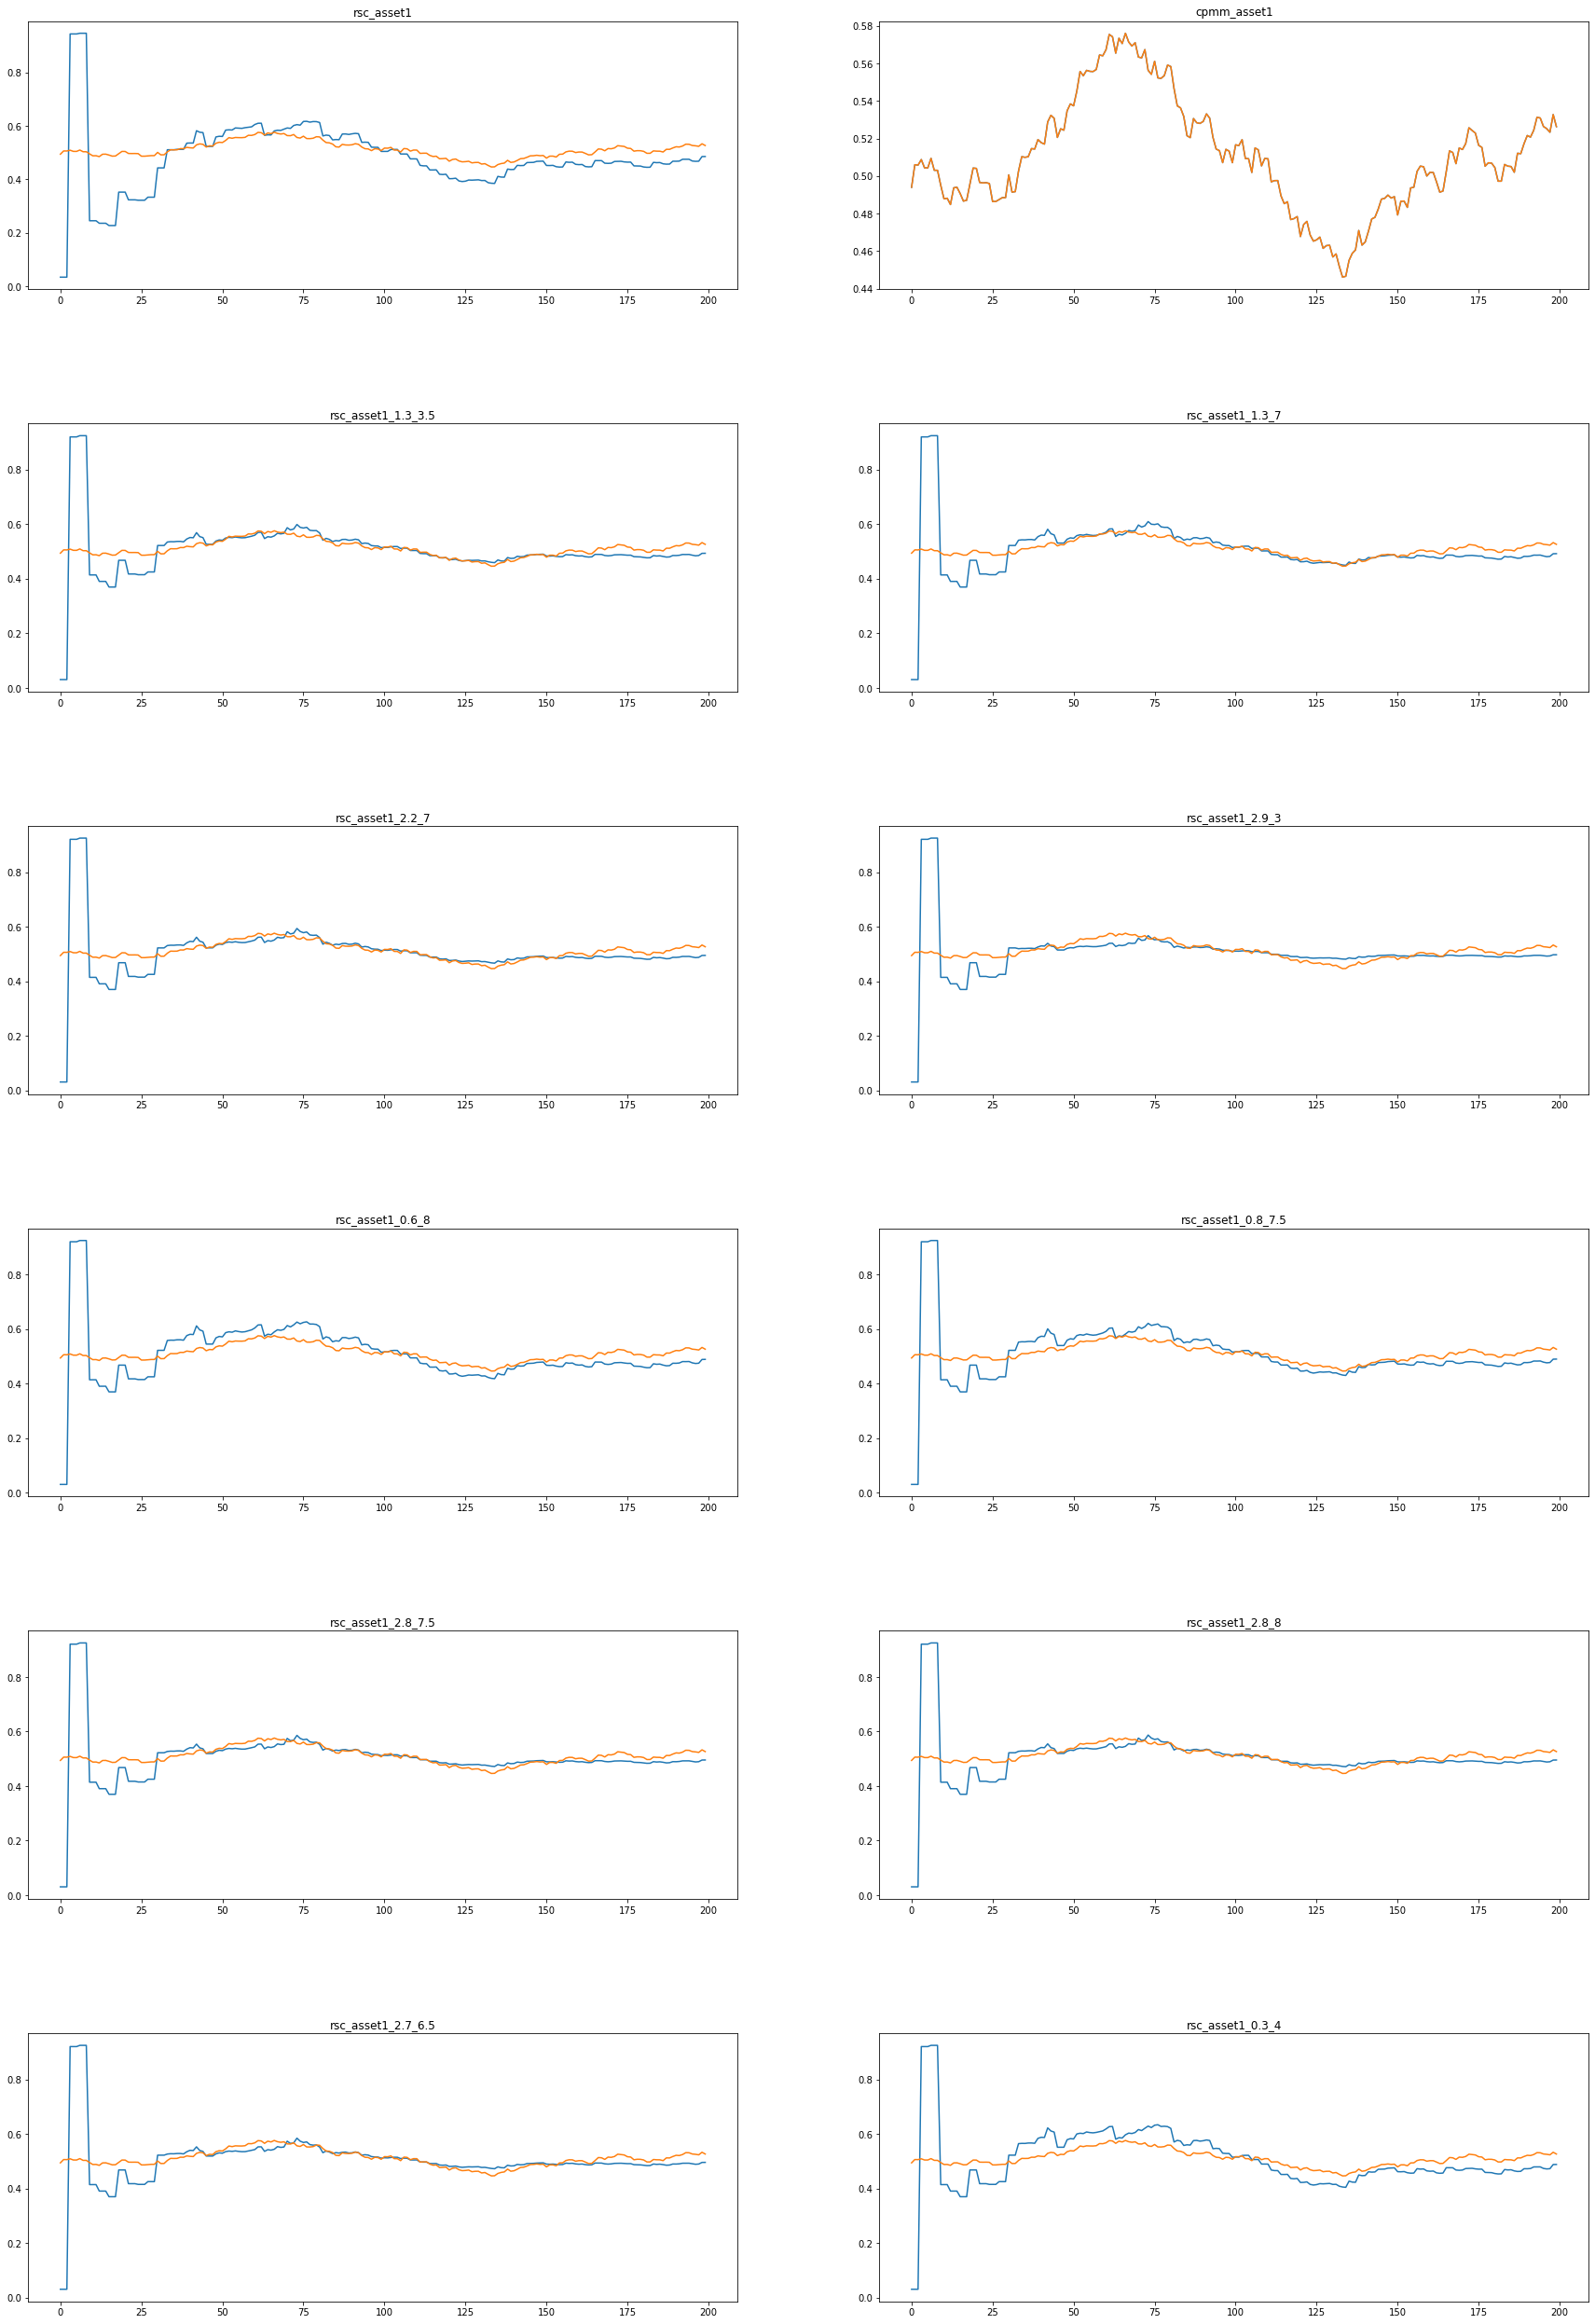

In [19]:
fig, axs = plt.subplots(6,2, figsize=(30, 45), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace= 0.2)

axs = axs.ravel()

for i in range(len(asset1_cols)):

    axs[i].plot(df[asset1_cols[i]])
    axs[i].plot(df['cpmm_asset1'])
    axs[i].set_title(asset1_cols[i])

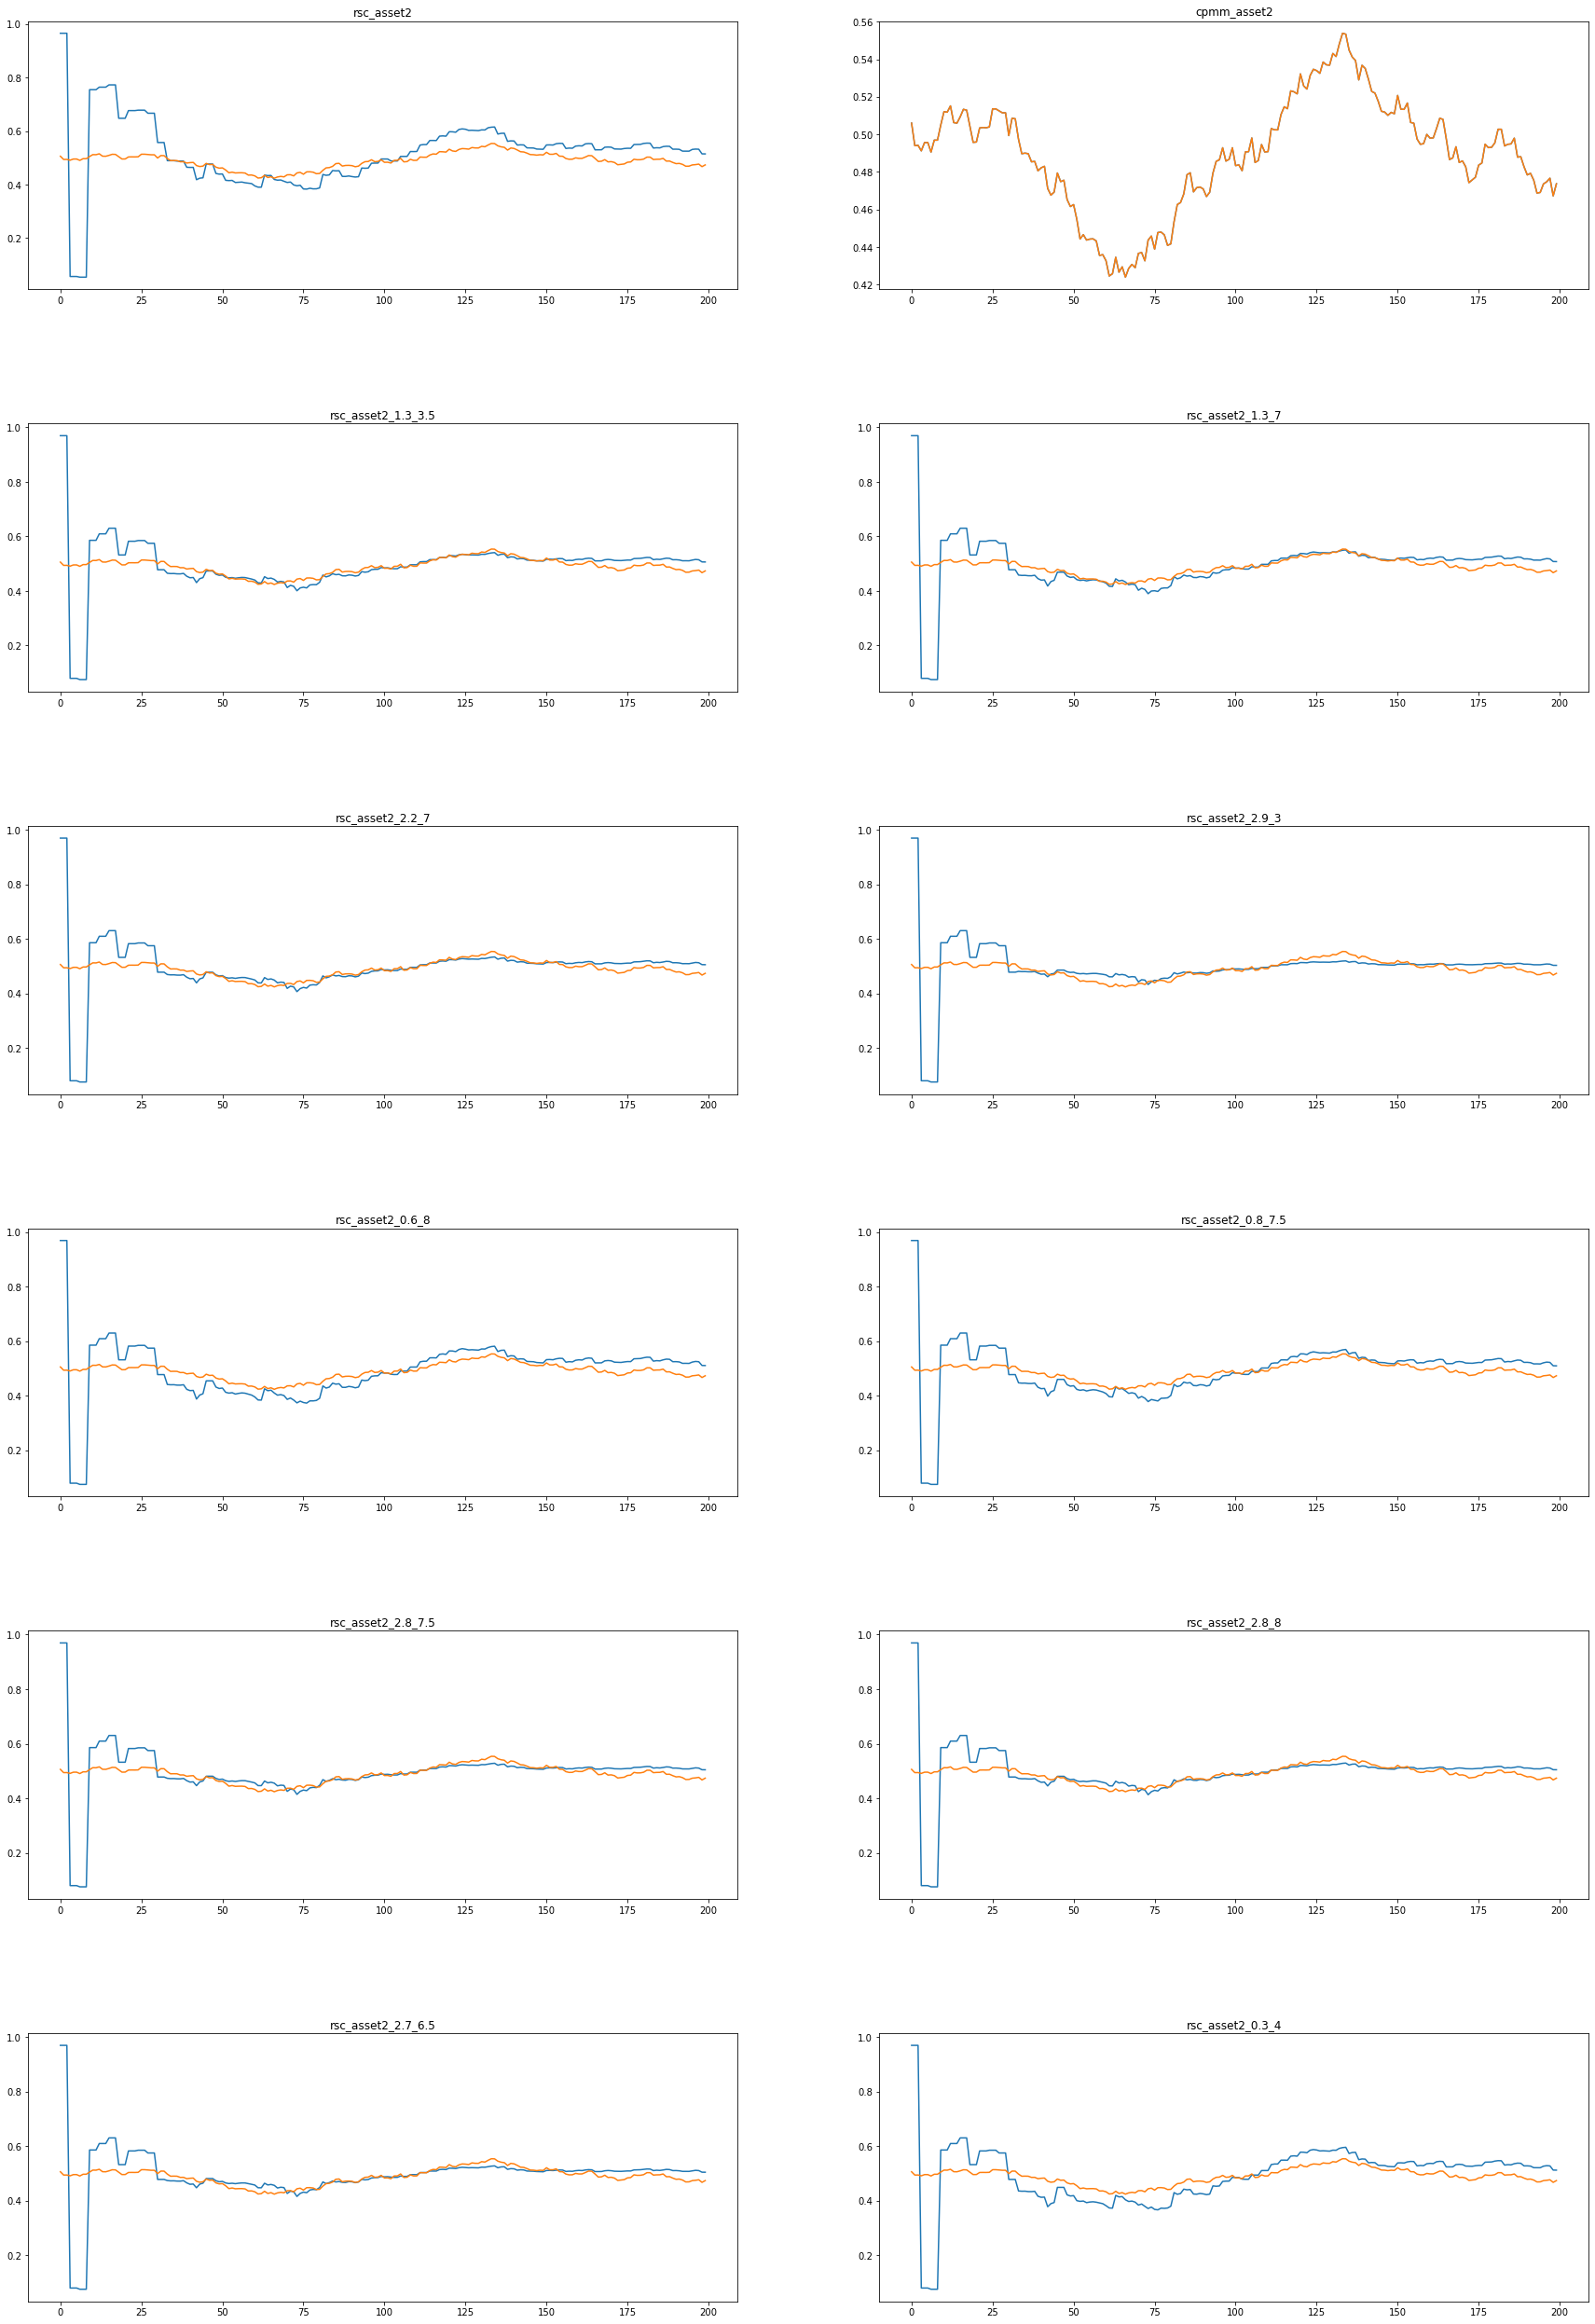

In [20]:
fig, axs = plt.subplots(6,2, figsize=(30, 45), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace= 0.2)

axs = axs.ravel()

for i in range(len(asset1_cols)):

    axs[i].plot(df[asset2_cols[i]])
    axs[i].plot(df['cpmm_asset2'])
    axs[i].set_title(asset2_cols[i])

In [21]:
rsc.book

,name,shares,outcome,paid,cost_function,dynamic_fee,lp
0,Trader-0,499.5879654403919,1,249.793983,504.563003,0.000000,0
1,Trader-1,-473.80897,0,4.304172,504.563003,0.000000,0
2,Trader-2,9.34442,A,0.030507,504.563003,0.000000,1
3,Trader-2,296.95838,B,0.969493,504.563003,0.000000,1
4,Trader-3,2898.07324257697,0,118.858027,2980.069018,0.000000,0
...,...,...,...,...,...,...,...
261,Trader-196,-52.160313,1,27.440029,30713.633836,0.126333,0
262,Trader-197,235.343163,A,0.471655,30713.633836,0.000000,1
263,Trader-197,263.629641,B,0.528345,30713.633836,0.000000,1
264,Trader-198,904.1967617799883,0,433.787627,30980.246388,0.110849,0


In [22]:
list(rsc.book['dynamic_fee'])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.089692352172169,
 0.0,
 0.0,
 0.08529008697064458,
 0.08326189584623234,
 0.0,
 0.0,
 0.0889757344852384,
 0.0902579039262029,
 0.0,
 0.0,
 0.07626637710096378,
 0.08634092810682668,
 0.0,
 0.0,
 0.14222994691050522,
 0.15560418907006174,
 0.0,
 0.0,
 0.15560418907006174,
 0.16551238521892822,
 0.0,
 0.0,
 0.14963350292486757,
 0.1552519780447078,
 0.0,
 0.0,
 0.1492152337332126,
 0.15180438341485755,
 0.0,
 0.0,
 0.16576837742384978,
 0.1696402922293809,
 0.0,
 0.0,
 0.14661097215088875,
 0.14472180097580076,
 0.0,
 0.0,
 0.1126870864127954,
 0.1240736276342411,
 0.0,
 0.0,
 0.1023551803943199,
 0.10902078781120594,
 0.0,
 0.0,
 0.0901237234078684,
 0.09151370290282757,
 0.0,
 0.0,
 0.06719951882917541,
 0.0722294673